# MC866 Project 1

## PART I - Clustering Methods

## K-Means

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
import matplotlib
import math
import time
import matplotlib.cm as cm
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [2]:
class KMeans:
    def __init__(self, X, n_clusters=5, random_state=None):
        self.n_clusters = n_clusters
        self.X = X
        self.rand = np.random.RandomState(random_state)
        self.centroids = []

    def init_centroids(self):
        self.centroids = self.rand.permutation(self.X)[:self.n_clusters]
            

    def __distances_by_cluster(self, data=None):
        if data is None:
            data = self.X
         
        distances = np.array([])
        for c in self.centroids:
            d = np.sqrt(np.power(data - c, 2).sum(axis=1))
            distances = np.append(distances, d)
        distances = distances.reshape((self.n_clusters, len(data)))
        distances = distances.T # list of distances of each centroid to the element in the given index (equivalent to zip(*distances) but faster)
        return distances

    def elbow_sse(self):
        distances = self.__distances_by_cluster()
        distances = np.min(distances, axis=1) # get only the min distance for each data point (the distance the its centroid)
        distances = np.power(distances, 2)
        return distances.sum()

    def silhouette_coefficient(self):
        result = []

        cluster_centroid_distances = self.__distances_by_cluster(data=self.centroids) # calculates the distance between the centroids to each other

        for i in range(cluster_centroid_distances.shape[0]):
            cluster_centroid_distances[i][i] = np.inf # make the distance of the cluster to itself infinite
        closest_cluster = np.argmin(cluster_centroid_distances, axis=1) # contains index of the cluster closest to the one in the array index
        clusters = self.clusters() # the cluster classification for each row of data
        for i in range(len(self.centroids)): # will calculate metrics from each cluster's perspective
            result.append([])
            closest_cluster_data = self.X[clusters == closest_cluster[i]] # filter only data that belongs to the closest cluster
            cluster_data = self.X[clusters == i] # filter only data from the current cluster
            # for each row of data in the cluster, we'll calculate the silhouette coefficient
            for row in cluster_data:
                # get the distances between the current data point and all the other points inside the same cluster
                inside_distances = np.sqrt(np.power(cluster_data - row, 2).sum(axis=1))
                # get the distances between the current data point and the other points inside the closest cluster
                closest_cluster_distances = np.sqrt(np.power(closest_cluster_data - row, 2).sum(axis=1))

                a = np.mean(inside_distances)
                b = np.mean(closest_cluster_distances)
                s = (b-a)/(max(a, b))
                result[i].append(s)

        return result

    # returns an array of what cluster each point of the dataset belongs to
    def clusters(self, data=None):
        distances = self.__distances_by_cluster(data=data)
        return np.argmin(distances, axis=1) # the index of which centroid each data point belongs to

    # Move the centroids to their cluster centers until convergence
    def fit(self):
        start_time = time.time()
        iterations = 0
        while True:
            iterations += 1
            clusters = self.clusters()
            changed = False
            for i in range(0, len(self.centroids)):
                data_filter = clusters == i
                filtered_data = self.X[data_filter] # only data that belongs to the cluster
                avg = np.sum(filtered_data, axis=0)
                avg = avg/filtered_data.shape[0]
                
                for j in range (0, avg.shape[0]):
                    if self.centroids[i][j] != avg[j]:
                        changed = True
                        self.centroids[i][j] = avg[j]
            if not changed:
                break
        
        print(f"converged in {iterations} iterations")
        print("--- %s seconds ---" % (time.time() - start_time))




### The Dataset
First we will run tests using the provided 2d dataset, splitting it in 90% for training and 10% for test.

Afterwards we'll run the same proccess on another dataset with more dimensions.

In [3]:
df = pd.read_csv("./data/cluster.dat", sep=' ', header=None)
df.head()

msk = np.random.rand(len(df)) < 0.9 # split dataset (90% train and 10% test)

df_train = df[msk]
df_test = df[~msk]

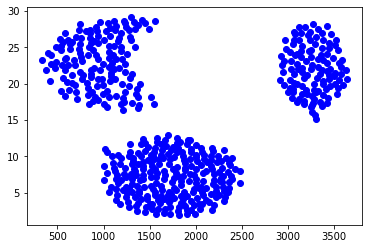

In [4]:
# 2D dataset

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="blue") # the data
plt.show()

By observing the visualization of the dataset, we can verify that 3 clusters would be adequate.

In [5]:
k = KMeans(X=df_train.to_numpy(), n_clusters=3)

The centroids are initialy positioned at random points of the dataset provided for training.

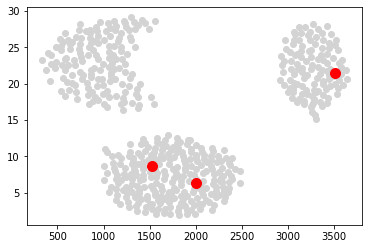

In [6]:
# initialize centroids and show their initial position in the chart
k.init_centroids()

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="lightgray") # the data
ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
plt.show()

We use the clusters method to get to which centroid each data point is closest to

In [7]:
k.clusters()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,

Initially without any fitting, the clusters provided are the following

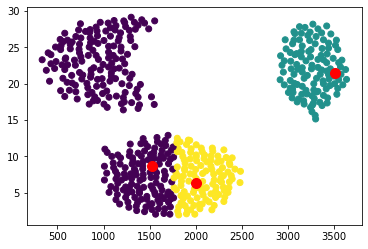

In [8]:
# Result of clusters before any fitting is done

c = k.clusters()

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c=c) # the data
ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
plt.show()

In [9]:
k.fit()

converged in 8 iterations
--- 0.0030968189239501953 seconds ---


### Results after fitting with the raw training data

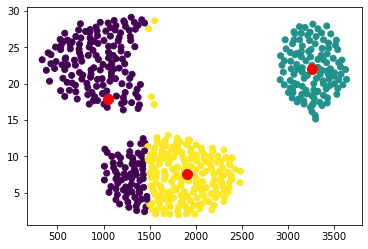

In [10]:
# Result of clusters after fitting is done

c = k.clusters()

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c=c) # the data
ax.scatter(k.centroids[:,:1],k.centroids[:,1:], c="red", s=100) # the data
plt.show()

As we can observe, we have a problem regarding the data normalization. Since the scale of the X axis of the chart is much larger than the Y axis. That inflates the euclidian distance in the X direction, so we get results that would not be intuitively expected.

### Normalizing the data
To solve that issue, we will normalize the data to fit in the interval \[0, 1\]

In [11]:
max_values = df_train.max()
df_train = df_train / max_values
df_test = df_test / max_values
df_train.head()

0         1
0  0.427785  0.982847
1  0.409904  0.945111
2  0.397524  0.972556
3  0.389271  0.987993
4  0.378267  0.962264

Then we'll run the kmeans operation again and check the results

converged in 20 iterations
--- 0.007126569747924805 seconds ---


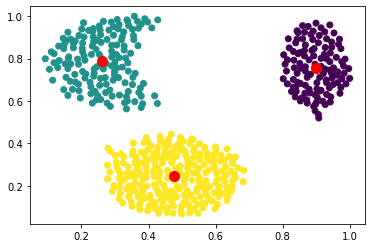

In [12]:
k = KMeans(X=df_train.to_numpy(), n_clusters=3)
k.init_centroids()
k.fit()

c = k.clusters()

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c=c) # the data
ax.scatter(k.centroids[:,:1],k.centroids[:,1:], c="red", s=100) # the data
plt.show()

From this we can observe the importance of data normalization when using kmeans for clustering data. Now we can observe that the expected intuitive result was achieved, so we will validate the results with the test data.

## Checking the test data distribution

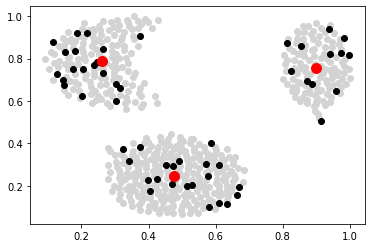

In [13]:
# the test data
fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="lightgray") # the data
ax.scatter(df_test.iloc[:,:1].values, df_test.iloc[:,1:].values, c="black") # the data
ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
plt.show()

## How the test data was classified using the prefitted kmeans model

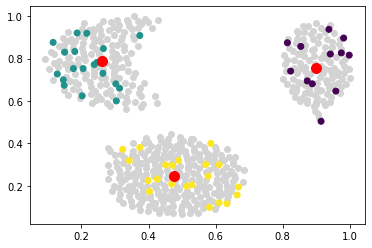

In [14]:
c = k.clusters(data=df_test.to_numpy())

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="lightgray") # the data
ax.scatter(df_test.iloc[:,:1].values, df_test.iloc[:,1:].values, c=c) # the data
ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
plt.show()

### Metrics

Now we will verify the results using a few metrics.

### The Elbow Method
We'll run the kmeans algorithm with different amounts of clusters and get the sum of the squared distance of each point of a cluster to it's centroid. 

converged in 2 iterations
--- 0.0006659030914306641 seconds ---
converged in 7 iterations
--- 0.002212047576904297 seconds ---
converged in 8 iterations
--- 0.002262115478515625 seconds ---
converged in 14 iterations
--- 0.0054798126220703125 seconds ---
converged in 6 iterations
--- 0.0028471946716308594 seconds ---
converged in 12 iterations
--- 0.005796194076538086 seconds ---
converged in 7 iterations
--- 0.003986835479736328 seconds ---
converged in 14 iterations
--- 0.008563995361328125 seconds ---
converged in 29 iterations
--- 0.020795822143554688 seconds ---


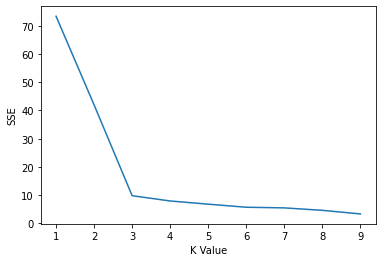

In [15]:
sse_values = []
cluster_range = range (1, 10)
for i in range (1, 10):
    k = KMeans(X=df_train.to_numpy(), n_clusters=i)
    k.init_centroids()
    k.fit()
    sse_values.append(k.elbow_sse())
    
fig, ax = plt.subplots()
ax.plot(cluster_range, sse_values) # the data
# ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
ax.set_xlabel("K Value")
ax.set_ylabel("SSE")
plt.show()


With the elbow method we can easily verify that 3 clusters intuitively chosen really is the optimal amount. 

### Silhouette Coeficient
Now lets do another analysis of the number of clusters using the silhouette coefficient for different configurations. We expect to receive the highest score with K=3.

converged in 5 iterations
--- 0.0017311573028564453 seconds ---
For 2 clusters, got silhouette score of 0.4598200325615125
converged in 5 iterations
--- 0.0013980865478515625 seconds ---
For 3 clusters, got silhouette score of 0.7068221775841391
converged in 4 iterations
--- 0.0016660690307617188 seconds ---
For 4 clusters, got silhouette score of 0.5170657726557844
converged in 14 iterations
--- 0.00419306755065918 seconds ---
For 5 clusters, got silhouette score of 0.46559662583920775
converged in 12 iterations
--- 0.004995822906494141 seconds ---
For 6 clusters, got silhouette score of 0.5546072666388375
converged in 14 iterations
--- 0.006155967712402344 seconds ---
For 7 clusters, got silhouette score of 0.46137122436575567
converged in 11 iterations
--- 0.005156993865966797 seconds ---
For 8 clusters, got silhouette score of 0.508394039095587
converged in 12 iterations
--- 0.008187055587768555 seconds ---
For 9 clusters, got silhouette score of 0.5081394301199088


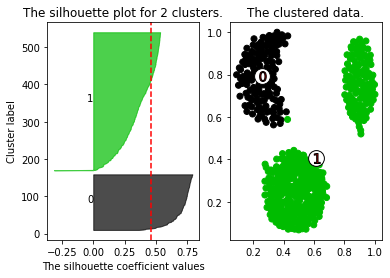

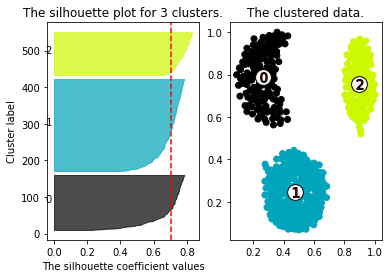

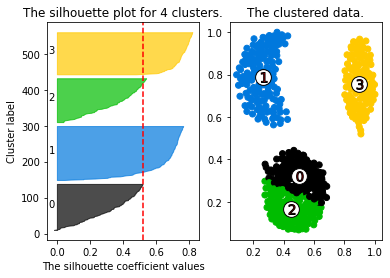

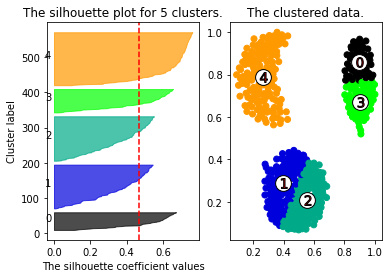

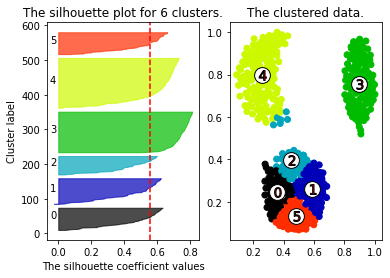

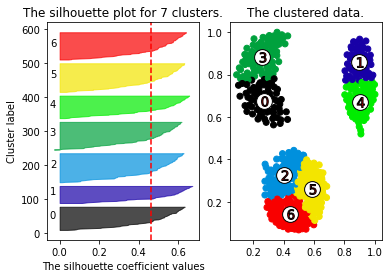

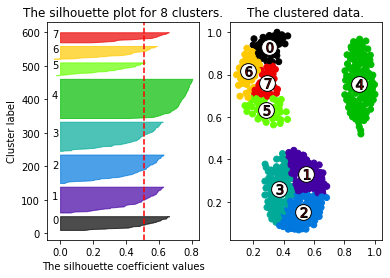

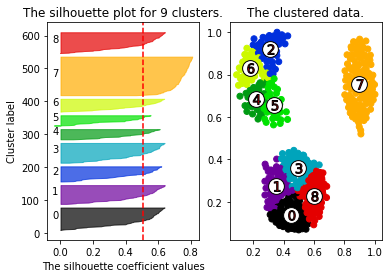

In [16]:
for num_clusters in range (2, 10):
    k = KMeans(X=df_train.to_numpy(), n_clusters=num_clusters)
    k.init_centroids()
    k.fit()
    s = k.silhouette_coefficient()
    flat_s = [item for sublist in s for item in sublist]
    silhouette_avg = np.average(np.array(flat_s))
    print(f"For {num_clusters} clusters, got silhouette score of {silhouette_avg}")

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    y_lower = 10
    for i in range(num_clusters):
        ith_cluster_values = s[i]
        ith_cluster_values.sort()
        size_cluster_i = len(ith_cluster_values)
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples
    
    ax1.set_title(f"The silhouette plot for {num_clusters} clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    silhouette_avg = np.average(np.array(flat_s))
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    c = k.clusters()
    colors = cm.nipy_spectral(c.astype(float) / num_clusters)
    ax2.set_title("The clustered data.")
    ax2.scatter(df_train.iloc[:, 0].values, df_train.iloc[:, 1].values, c=colors) # the data
    ax2.scatter(k.centroids[:, 0], k.centroids[:, 1], marker='o', c="white", alpha=1, s=250, edgecolor='k')
    for i, c in enumerate(k.centroids):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, s=100, alpha=1, edgecolor='k', c='red')

plt.show()

And as expected, we received the highest score for 3 clusters. Again confirming our results.

## Second problem
Now we'll tackle a problem with many more dimensions using clustering algorithms. As a proposed problem we'll attempt to solve the handwritten digits dataset using only unsupervised clustering.

We are using the skelearn digits dataset because it's an already scalled down version of the MNIST dataset, where each image has only 64 features, greatly reducing the time required to fit the models.

Since there are 10 classes in the dataset (the ten digits), an intuitive value for K would be 10, but we will validate that value using the analysis that we showed previously.

First we'll fetch the *MNIST* dataset from scikit, and do normalizations

Features 64


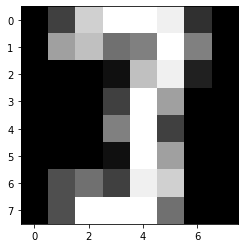

In [17]:
X, y = load_digits(return_X_y=True) # fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False) # 
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.1)
# since we know that the maximum value of a pixel in the dataset is 255, we'll just divide everything by 255 for scaling.
X_train = X_train / np.max(X_train)
X_test = X_test / np.max(X_train)
print("Features", X_train.shape[1])

plt.imshow(X_train[2].reshape((8,8)), cmap='gray', vmin=0, vmax=1)
plt.show()

### The elbow analysis

converged in 2 iterations
--- 0.007977962493896484 seconds ---
converged in 12 iterations
--- 0.07686400413513184 seconds ---
converged in 22 iterations
--- 0.18497896194458008 seconds ---
converged in 16 iterations
--- 0.17100214958190918 seconds ---
converged in 21 iterations
--- 0.2971179485321045 seconds ---
converged in 16 iterations
--- 0.2831459045410156 seconds ---
converged in 15 iterations
--- 0.30779099464416504 seconds ---
converged in 16 iterations
--- 0.3175230026245117 seconds ---
converged in 28 iterations
--- 0.7380712032318115 seconds ---
converged in 11 iterations
--- 0.30120396614074707 seconds ---
converged in 22 iterations
--- 0.6936917304992676 seconds ---
converged in 29 iterations
--- 1.003981113433838 seconds ---
converged in 31 iterations
--- 1.1144540309906006 seconds ---
converged in 18 iterations
--- 0.6728470325469971 seconds ---


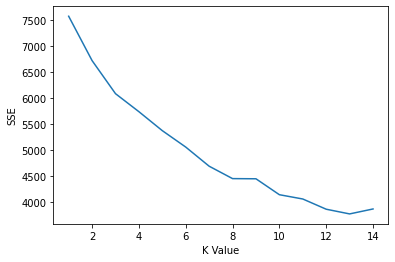

In [26]:
sse_values = []
cluster_range = range (1, 15)
for i in cluster_range:
    k = KMeans(X=X_train, n_clusters=i)
    k.init_centroids()
    k.fit()
    sse_values.append(k.elbow_sse())
    
fig, ax = plt.subplots()
ax.plot(cluster_range, sse_values) # the data
# ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
ax.set_xlabel("K Value")
ax.set_ylabel("SSE")
plt.show()

converged in 49 iterations
--- 0.31390380859375 seconds ---
For 2 clusters, got silhouette score of 0.10403500609865407
converged in 11 iterations
--- 0.09943675994873047 seconds ---
For 3 clusters, got silhouette score of 0.15052525773567024
converged in 19 iterations
--- 0.20113611221313477 seconds ---
For 4 clusters, got silhouette score of 0.1647846263789688
converged in 16 iterations
--- 0.22234869003295898 seconds ---
For 5 clusters, got silhouette score of 0.20316252506944227
converged in 22 iterations
--- 0.3458552360534668 seconds ---
For 6 clusters, got silhouette score of 0.19107226255803988
converged in 16 iterations
--- 0.2741670608520508 seconds ---
For 7 clusters, got silhouette score of 0.20316619149440096
converged in 27 iterations
--- 0.5364878177642822 seconds ---
For 8 clusters, got silhouette score of 0.19331409214328632
converged in 33 iterations
--- 0.707589864730835 seconds ---
For 9 clusters, got silhouette score of 0.2381384228422113
converged in 16 iterations

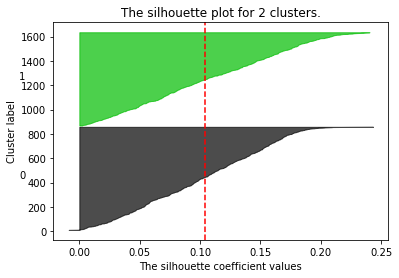

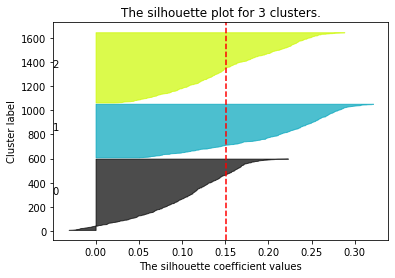

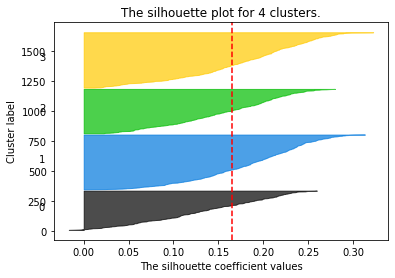

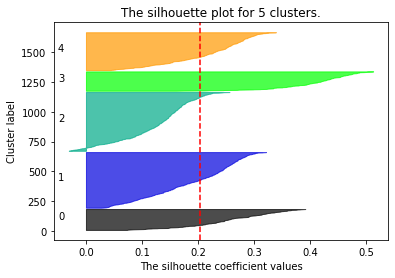

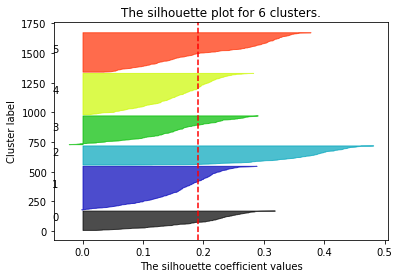

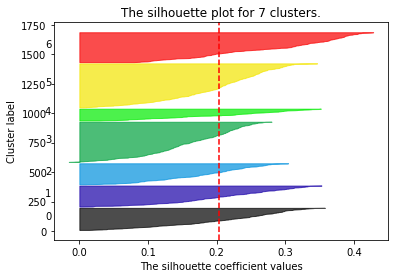

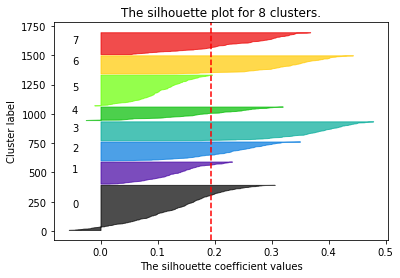

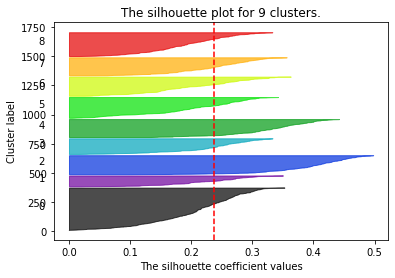

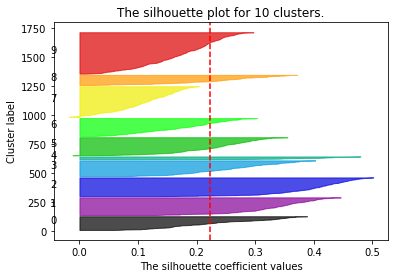

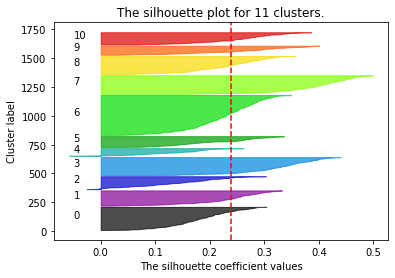

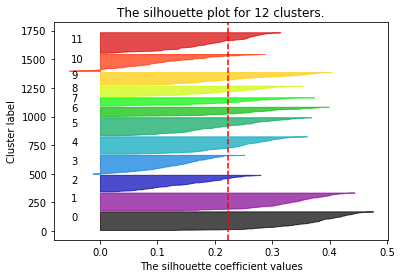

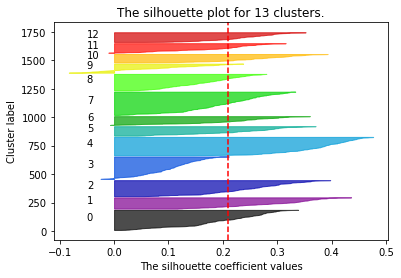

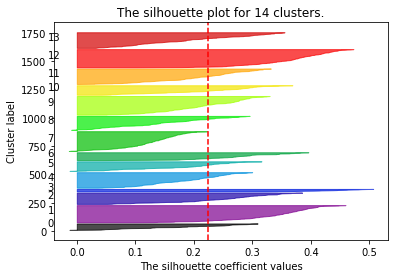

In [27]:
for num_clusters in range (2, 15):
    k = KMeans(X=X_train, n_clusters=num_clusters)
    k.init_centroids()
    k.fit()
    s = k.silhouette_coefficient()
    flat_s = [item for sublist in s for item in sublist]
    silhouette_avg = np.average(np.array(flat_s))
    print(f"For {num_clusters} clusters, got silhouette score of {silhouette_avg}")

    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots()
    y_lower = 10
    for i in range(num_clusters):
        ith_cluster_values = s[i]
        ith_cluster_values.sort()
        size_cluster_i = len(ith_cluster_values)
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples
    
    ax1.set_title(f"The silhouette plot for {num_clusters} clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    c = k.clusters()
    colors = cm.nipy_spectral(c.astype(float) / num_clusters)
    # ax2.set_title("The clustered data.")
    # ax2.scatter(X_train[:, 0], X_train[:, 1], c=colors) # the data
    # ax2.scatter(k.centroids[:, 0], k.centroids[:, 1], marker='o', c="white", alpha=1, s=250, edgecolor='k')
    # for i, c in enumerate(k.centroids):
        # ax2.scatter(c[0], c[1], marker='$%d$' % i, s=100, alpha=1, edgecolor='k', c='red')

plt.show()

From the elbow and silhouette analysis, we would assume that the optimal amount of clusters would be between 10 and 13. But since that doesn't really make much sense in the problem that we're trying to solve, we'll use the expected 10 and check for results.

In [36]:
# We'll run the method 50 times, and consider the one with the highest silhouette avg
models = []
for i in range(50):
    k = KMeans(X=X_train, n_clusters=num_clusters)
    k.init_centroids()
    k.fit()
    models.append(k)

biggest_s = -1.0
best_k = None
for k in models:
    s = k.silhouette_coefficient()
    flat_s = [item for sublist in s for item in sublist]
    silhouette_avg = np.average(np.array(flat_s))
    if silhouette_avg > biggest_s:
        smallest_s = silhouette_avg
        best_k = k


s = best_k.silhouette_coefficient()
flat_s = [item for sublist in s for item in sublist]
silhouette_avg = np.average(np.array(flat_s))
print("silhouette", silhouette_avg)

converged in 23 iterations
--- 0.860623836517334 seconds ---
converged in 24 iterations
--- 0.9104068279266357 seconds ---
converged in 16 iterations
--- 0.5423049926757812 seconds ---
converged in 15 iterations
--- 0.5251138210296631 seconds ---
converged in 28 iterations
--- 0.9279980659484863 seconds ---
converged in 15 iterations
--- 0.5010418891906738 seconds ---
converged in 21 iterations
--- 0.6984848976135254 seconds ---
converged in 22 iterations
--- 0.7909221649169922 seconds ---
converged in 31 iterations
--- 1.2387840747833252 seconds ---
converged in 24 iterations
--- 0.976165771484375 seconds ---
converged in 18 iterations
--- 0.6827547550201416 seconds ---
converged in 27 iterations
--- 1.011098861694336 seconds ---
converged in 22 iterations
--- 0.9886329174041748 seconds ---
converged in 11 iterations
--- 0.4826681613922119 seconds ---
converged in 13 iterations
--- 0.510174036026001 seconds ---
converged in 24 iterations
--- 0.9789538383483887 seconds ---
converged in

### Applying PCA

In [37]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_train)
df_train_pca = pca.transform(X_train)

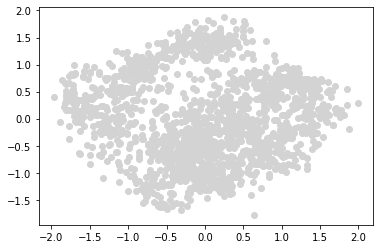

In [38]:
fig, ax = plt.subplots()
ax.scatter(df_train_pca[:,:1], df_train_pca[:,1:], c="lightgray") # the data
# ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
plt.show()

In [41]:
k_pca = KMeans(X=df_train_pca, n_clusters=10)
k_pca.init_centroids()

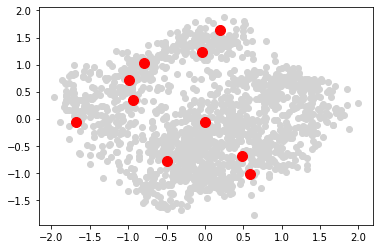

In [42]:
fig, ax = plt.subplots()
ax.scatter(df_train_pca[:,:1], df_train_pca[:,1:], c="lightgray") # the data
ax.scatter(k_pca.centroids[:,:1], k_pca.centroids[:,1:], c="red", s=100) # the data
plt.show()

In [43]:
k_pca.fit()

converged in 27 iterations
--- 0.055191993713378906 seconds ---


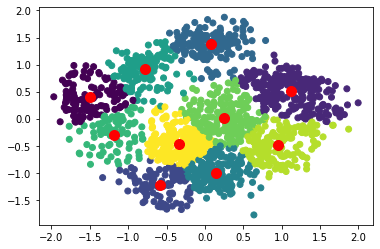

In [44]:
# Result of clusters after fitting is done

c = k_pca.clusters()

fig, ax = plt.subplots()
ax.scatter(df_train_pca[:,:1], df_train_pca[:,1:], c=c) # the data
ax.scatter(k_pca.centroids[:,:1],k_pca.centroids[:,1:], c="red", s=100) # the data
plt.show()